In [1]:
import numpy as np    
from numba import njit
import matplotlib.pyplot as plt

In [32]:
import sys
from tqdm.auto import tqdm
from numba import njit
from numpy import pi

In [3]:
k1 = 1
k2 = 0.002
eps = 0.5
alpha = 0
v = 0
F0 = 1
m = 1

In [4]:
((k2*np.sqrt(m)*v*pi)/(k2+2*k1)**1.5) + (2*F0*eps/(k2+2*k1)) + (((F0**2)*(m**1.5)*eps*alpha*pi)/(2*(k2+2*k1)**1.5))

0.4995004995004996

In [5]:
def getDeltaX(k1,k2,eps,alpha,v,F0,m):
    return ((k2*np.sqrt(m)*v*pi)/(k2+2*k1)**1.5) + (2*F0*eps/(k2+2*k1)) + (((F0**2)*(m**1.5)*eps*alpha*pi)/(2*(k2+2*k1)**1.5))

In [6]:
dx = getDeltaX(k1,k2,eps,alpha,v,F0,m)
dx

0.4995004995004996

In [35]:
threshold = 1
avalanchesData = np.zeros(1_000)
L = 1_00
increament = k1*dx
decreament = (2*k1 + k2)*dx
max = 20000
A = np.zeros(20000)
B = np.zeros(20000)
lenA = 0
lenb = 0

In [10]:
1/L,increament,decreament,decreament-2*increament

(0.01, 0.4995004995004996, 1.0, 0.0009990009990008542)

In [24]:
def step(lattice):
    A = [(int(np.where(lattice == np.max(lattice))[0]))]
    lattice += 1-np.max(lattice)
    return fall(lattice,A)  

In [25]:
def fall(lattice,A):
    nFalls = 1
    B = []
    while len(A)+len(B) != 0 : 
        lattice,B = check(lattice,A)
        lattice,A = check(lattice,B)  

        nFalls += len(A)+len(B)

        if nFalls > max:
            print("reached to the max")
            break

    return lattice,nFalls

In [26]:
def run(lattice,steps):
    dataSet = np.zeros(steps,dtype=np.int64)
    for i in range(10000):
        lattice , data = step(lattice)

    for i in tqdm(range(steps)):
        lattice , data = step(lattice)
        dataSet[i] = data
    
    return dataSet,lattice

In [27]:
# def check(lattice,points):
#     out = []

#     for idx in points:
           
#         if lattice[idx]+increament < threshold:   
#             lattice[idx] += increament 
#         else: 
#             lattice[idx] += increament - decreament 

#             if idx < L-1:
#                 out.append(idx+1)
                    
#             if idx > 0 :
#                 out.append(idx-1)

#     return lattice,out
                
@njit
def check(lattice,points):
    out = []
    for idx in points:

        while(lattice[idx] >= threshold):
            lattice[idx] -= decreament 

            if idx < L-1:
                lattice[idx+1] += increament 
                if lattice[idx+1] >= threshold:
                    out.append(idx+1)
                        
            if idx > 0 :
                lattice[idx-1] += increament 
                if lattice[idx-1] >= threshold:
                    out.append(idx-1)

    return lattice,out        
            
   

In [28]:
def getHist(avalanchesData):
    sortedValues = list(set(avalanchesData))
    sortedValues.sort()
    counts = np.zeros(len(sortedValues))
    for i in tqdm(range(len(sortedValues))):
        counts[i] = list(avalanchesData).count(sortedValues[i])
    return [counts,sortedValues]

In [29]:
lattice = np.random.uniform(0,threshold,L)

<BarContainer object of 100 artists>

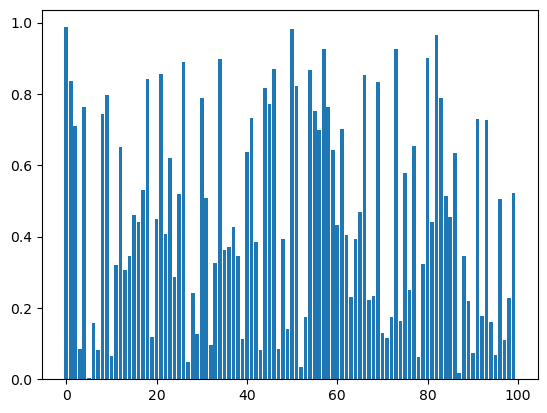

In [30]:
plt.bar(np.arange(L),lattice)

In [31]:
data,lattice = run(lattice,10_000)

/home/alireza-astane/anaconda3/lib/python3.11/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'points' of function 'check'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../tmp/ipykernel_3265/4059202304.py", line 19:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


ValueError: cannot compute fingerprint of empty list

<BarContainer object of 1000 artists>

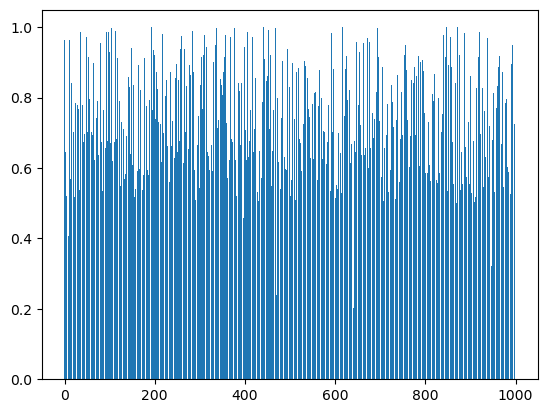

In [99]:

plt.bar(np.arange(L),lattice)

In [44]:
np.save("data3",data)

In [13]:
data = np.load("./data.npy")
data2 = np.load("./data2.npy")

In [113]:
np.max(data)

12

In [85]:
data.shape

(10000000,)

In [25]:
bins = np.logspace(np.log10(np.median(data)),np.log10(np.max(data)),50)

In [89]:
np.max(data)

13

In [100]:
counts ,bins = getHist(data)

  0%|          | 0/359 [00:00<?, ?it/s]

In [26]:
counts , bins = np.histogram(data,bins)

In [22]:
len(counts),len(bins)

(732, 732)

In [23]:
np.max(data)

732

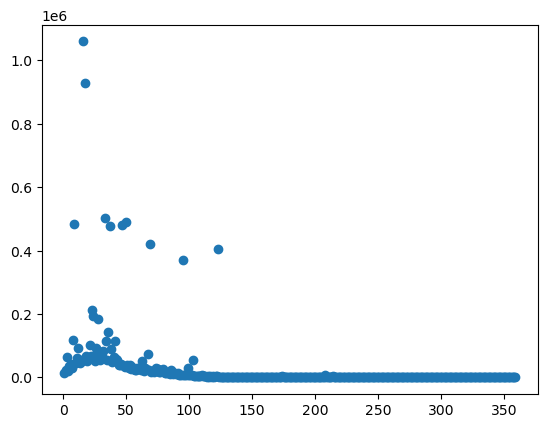

In [103]:
plt.scatter(bins,counts)

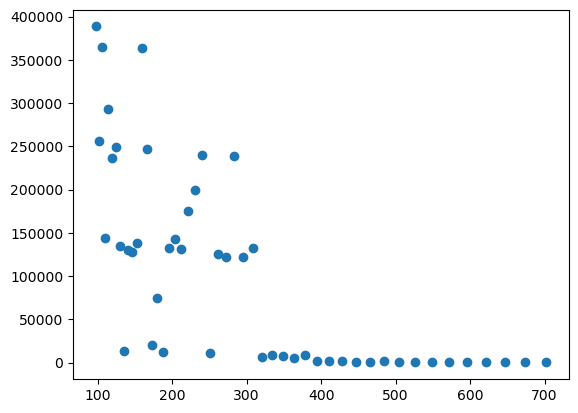

In [27]:
plt.scatter(bins[:-1],counts)

In [78]:
import scipy

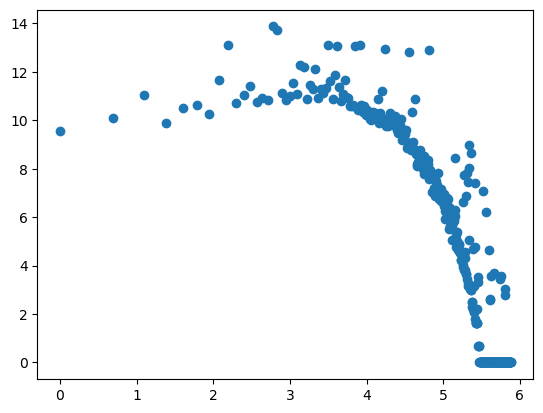

In [104]:
plt.scatter(np.log(bins),np.log(counts))


In [80]:
def getHist(avalanchesData):
    sortedValues = list(set(avalanchesData))
    sortedValues.sort()
    counts = np.zeros(len(sortedValues))
    for i in range(len(sortedValues)):
        counts[i] = list(avalanchesData).count(sortedValues[i])

    return [counts,sortedValues]

In [84]:
np.max(data)

13

In [81]:
c,s = getHist(data)

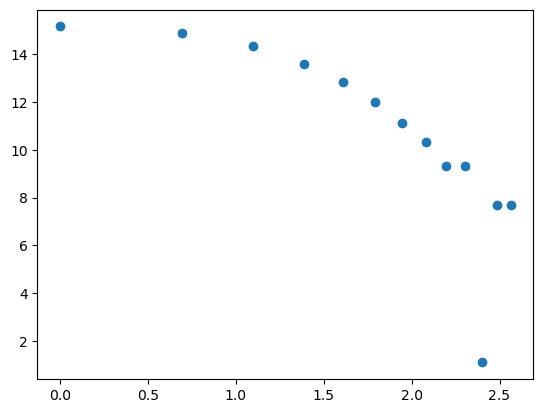

In [82]:
plt.scatter(np.log(s),np.log(c))

In [2]:
import SOC

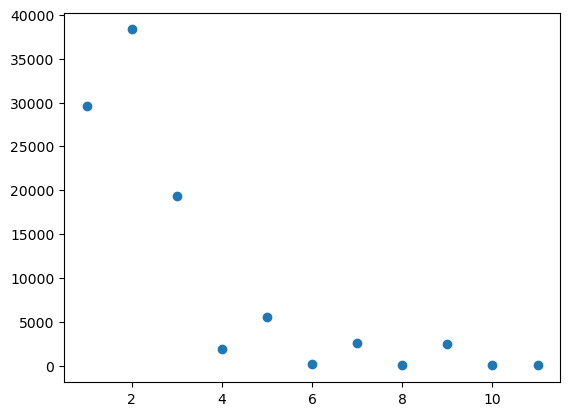

In [80]:
plt.scatter(s[:40],c[:40])

ModuleNotFoundError: No module named 'SOC'